In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LSTM
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
# from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow import keras
from tensorflow.keras import layers
# from kerastuner.tuners import RandomSearch

In [2]:
df_test = pd.read_csv('/content/Google_Stock_Price_Test.csv')
df_train = pd.read_csv('/content/Google_Stock_Price_Train.csv')
df = pd.concat([df_test,df_train])

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,02/01/2018,1048.339966,1066.939941,1045.229980,1065.0,1237600
1,03/01/2018,1064.310059,1086.290039,1063.209961,1082.47998,1430200
2,04/01/2018,1088.000000,1093.569946,1084.001953,1086.400024,1004600
3,05/01/2018,1094.000000,1104.250000,1092.000000,1102.22998,1279100
4,08/01/2018,1102.229980,1111.270020,1101.619995,1106.939941,1047600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1634 entries, 0 to 1508
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1634 non-null   object 
 1   Open    1634 non-null   float64
 2   High    1634 non-null   float64
 3   Low     1634 non-null   float64
 4   Close   1634 non-null   object 
 5   Volume  1634 non-null   object 
dtypes: float64(3), object(3)
memory usage: 89.4+ KB


In [5]:
df.describe()

,Open,High,Low
count,1634.000000,1634.000000,1634.000000
mean,635.900458,640.888439,630.533293
std,235.149366,237.123571,233.300180
min,279.120000,281.210000,277.220000
25%,442.382500,446.045000,439.920000
50%,578.415000,581.830000,572.880000
75%,782.747500,788.937500,778.352500
max,1177.329956,1186.890015,1171.979980


In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [7]:
df.shape

(1634, 6)

In [8]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [9]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object

In [10]:
df    = df.loc[:,["Open"]].values
train = df[:len(df)-50] 
test = df[len(train):] 
# reshape
train = train.reshape(train.shape[0],1)


In [11]:
train.shape

(1584, 1)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1)) # defining of Scaler
train_scaled = scaler.fit_transform(train) # applying to Scaler to train

# plt.plot(train_scaled)
# plt.show()

In [13]:
# We add first 50 location to "X_train" and we 51. location to "y_train" .
X_train = []
y_train = []
timesteps = 50

for i in range(timesteps, train_scaled.shape[0]):
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)


# Reshaping
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Dimension of array is 3.

In [14]:
# --- RNN ---

# Importing the Keras libraries and packages

from keras.models import Sequential  
from keras.layers import Dense 
from keras.layers import SimpleRNN
from keras.layers import Dropout # it block to overfitting 

# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2)) 

# Adding a second RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation. 
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
48/48 [==============================] - 8s 52ms/step - loss: 0.3590
Epoch 2/100
48/48 [==============================] - 3s 53ms/step - loss: 0.2094
Epoch 3/100
48/48 [==============================] - 3s 68ms/step - loss: 0.1482
Epoch 4/100
48/48 [==============================] - 4s 75ms/step - loss: 0.1093
Epoch 5/100
48/48 [==============================] - 2s 52ms/step - loss: 0.0825
Epoch 6/100
48/48 [==============================] - 3s 56ms/step - loss: 0.0655
Epoch 7/100
48/48 [==============================] - 2s 51ms/step - loss: 0.0541
Epoch 8/100
48/48 [==============================] - 3s 68ms/step - loss: 0.0435
Epoch 9/100
48/48 [==============================] - 3s 62ms/step - loss: 0.0324
Epoch 10/100
48/48 [==============================] - 2s 51ms/step - loss: 0.0295
Epoch 11/100
48/48 [==============================] - 2s 50ms/step - loss: 0.0256
Epoch 12/100
48/48 [==============================] - 2s 52ms/step - loss: 0.0214
Epoch 13/100
48/48 [=====

In [15]:
inputs = df[len(df) - len(test) - timesteps:]
inputs = scaler.transform(inputs)  # min max scaler

In [16]:
X_test = []
for i in range(timesteps, inputs.shape[0]):
    X_test.append(inputs[i-timesteps:i, 0])  
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [17]:
predicted_data = regressor.predict(X_test)
predicted_data = scaler.inverse_transform(predicted_data)

2/2 [==============================] - 1s 24ms/step


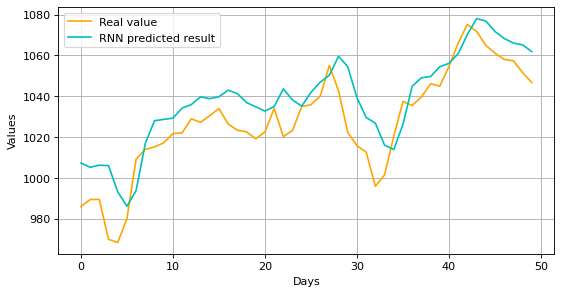

In [18]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="orange",label="Real value")
plt.plot(predicted_data,color="c",label="RNN predicted result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()